In [116]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#ignore annoying warning (from sklearn and seaborn)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

In [117]:
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client['house-rent']
collection = db.housingdb
data = pd.DataFrame(list(collection.find()))
# data = pd.DataFrame.from_records(db.rentdatabase.houseRent.find())

In [118]:
# data = pd.read_csv('../input/feature-engineering-house-rent-prediction//data_cleaned.csv')
data.shape

(265190, 23)

In [317]:
data

,_id,id,url,region,region_url,price,type,sqfeet,beds,baths,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,637dc07729d64c4ec2f9e11d,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,637dc07729d64c4ec2f9e11e,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,637dc07729d64c4ec2f9e11f,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,637dc07729d64c4ec2f9e120,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,637dc07729d64c4ec2f9e121,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164278,637dc09629d64c4ec2fdecfc,7049194586,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,870,apartment,933,2,2,...,0,0,0,w/d hookups,street parking,https://images.craigslist.org/00G0G_3wSexhiMcr...,"At Winchester Park, you can choose from 1 & 2 ...",39.8971,-82.8957,oh
164279,637dc09629d64c4ec2fdecfd,7050888256,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,929,apartment,728,1,1,...,1,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00v0v_cE9ismC2Ad...,"Designed with your comfort in mind, Bexley Hou...",39.9709,-82.9241,oh
164280,637dc09629d64c4ec2fdecfe,7050851033,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,0,apartment,1061,2,2,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00m0m_8wP9hX96TZ...,â BERKLEY HOUSE â Voted #1 BEST Communit...,40.0495,-83.0669,oh
164281,637dc09629d64c4ec2fdecff,7050887997,https://columbus.craigslist.org/apa/d/grove-ci...,columbus,https://columbus.craigslist.org,1069,apartment,1020,2,1.5,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00N0N_ioCvFNCv24...,!!!!Tour today and receive $5 Starbucks gift c...,39.8408,-83.0804,oh


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   _id                      265190 non-null  object
 1   id                       265190 non-null  object
 2   url                      265190 non-null  object
 3   region                   265190 non-null  object
 4   region_url               265190 non-null  object
 5   price                    265190 non-null  object
 6   type                     265190 non-null  object
 7   sqfeet                   265190 non-null  object
 8   beds                     265190 non-null  object
 9   baths                    265190 non-null  object
 10  cats_allowed             265190 non-null  object
 11  dogs_allowed             265190 non-null  object
 12  smoking_allowed          265190 non-null  object
 13  wheelchair_access        265190 non-null  object
 14  electric_vehicle_cha

In [121]:
data.isnull().sum()

_id                            0
id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
image_url                      0
description                    2
lat                         1419
long                        1419
state                          1
dtype: int64

In [122]:
data = data.dropna()
data = data.reset_index(drop=True)

In [123]:
print("There are {} duplicate values.".format(data.duplicated().sum()))
data[data.duplicated(keep=False)].head(10)
# data.head()

There are 0 duplicate values.


,_id,id,url,region,region_url,price,type,sqfeet,beds,baths,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state


In [124]:
rental = data[["sqfeet", "beds", "baths", "parking_options", "state","region","comes_furnished", "type", "price", "laundry_options"]]

In [125]:
rental.head(10)

,sqfeet,beds,baths,parking_options,state,region,comes_furnished,type,price,laundry_options
0,1908,3,2,street parking,al,birmingham,0,apartment,1195,laundry on site
1,1319,3,2,off-street parking,al,birmingham,0,apartment,1120,laundry on site
2,1133,1,1.5,street parking,al,birmingham,0,apartment,825,laundry on site
3,927,1,1,street parking,al,birmingham,0,apartment,800,laundry on site
4,1047,2,1,street parking,al,birmingham,0,apartment,785,laundry on site
5,1298,2,2,street parking,al,birmingham,0,apartment,900,laundry on site
6,1350,2,2,street parking,al,birmingham,0,apartment,925,laundry on site
7,1375,3,2,off-street parking,al,birmingham,0,apartment,1355,w/d hookups
8,1319,3,2,off-street parking,al,birmingham,0,apartment,1120,laundry on site
9,672,2,1,carport,al,birmingham,0,house,685,w/d hookups


In [126]:
rental["state"].value_counts()

ca    24175
fl    15232
mi     9834
nc     8886
ny     7250
il     6682
ga     6667
co     6481
ks     6031
mn     5347
ia     5040
az     4880
oh     4606
la     4041
al     3748
nj     3732
in     3621
ma     3599
id     3592
ky     2855
ms     2788
ct     2683
nd     2617
md     2550
nv     2056
ne     1969
nm     1846
ar     1802
ak     1655
nh     1570
hi     1488
mo     1442
dc     1382
mt      976
de      708
me      385
or       35
ok       32
Name: state, dtype: int64

In [127]:
rental["comes_furnished"].value_counts()

0    154584
1      9699
Name: comes_furnished, dtype: int64

In [128]:
rental["type"].value_counts()

apartment          129157
house               15944
townhouse            8374
condo                3712
duplex               3056
manufactured         2711
cottage/cabin         484
loft                  414
flat                  306
in-law                120
land                    4
assisted living         1
Name: type, dtype: int64

In [300]:
# drop sqfeet = 0
rental = rental[rental["sqfeet"] != 0].reset_index(drop=True)

# drop sqfeet > 0
rental = rental[rental["sqfeet"] <= 5000].reset_index(drop=True)

# drop beds = 0
rental = rental[rental["beds"] != 0].reset_index(drop=True)

# drop beds > 50
rental = rental[rental["beds"] <= 50].reset_index(drop=True)

# drop baths = 0
rental = rental[rental["baths"] != 0].reset_index(drop=True)

# drop baths > 100
rental = rental[rental["baths"] <= 100].reset_index(drop=True)

# drop price = 0
rental = rental[rental["price"] != 0].reset_index(drop=True)

In [301]:
rental.head(10)

,sqfeet,beds,baths,parking_options,state,region,comes_furnished,type,price,laundry_options
0,1908,3,2.0,street parking,al,birmingham,0,apartment,1195,laundry on site
1,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120,laundry on site
2,1133,1,1.5,street parking,al,birmingham,0,apartment,825,laundry on site
3,927,1,1.0,street parking,al,birmingham,0,apartment,800,laundry on site
4,1047,2,1.0,street parking,al,birmingham,0,apartment,785,laundry on site
5,1298,2,2.0,street parking,al,birmingham,0,apartment,900,laundry on site
6,1350,2,2.0,street parking,al,birmingham,0,apartment,925,laundry on site
7,1375,3,2.0,off-street parking,al,birmingham,0,apartment,1355,w/d hookups
8,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120,laundry on site
9,672,2,1.0,carport,al,birmingham,0,house,685,w/d hookups


In [302]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157580 entries, 0 to 157579
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sqfeet           157580 non-null  int64  
 1   beds             157580 non-null  int64  
 2   baths            157580 non-null  float64
 3   parking_options  157580 non-null  object 
 4   state            157580 non-null  object 
 5   region           157580 non-null  object 
 6   comes_furnished  157580 non-null  object 
 7   type             157580 non-null  object 
 8   price            157580 non-null  int64  
 9   laundry_options  157580 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 12.0+ MB


In [303]:
#statistics of the Rent Per Mth column
with pd.option_context('float_format', '{:f}'.format): print(rental["price"].describe())

count       157580.000000
mean         19560.115287
std        6974223.417067
min              1.000000
25%            830.000000
50%           1095.000000
75%           1510.000000
max     2768307249.000000
Name: price, dtype: float64


In [266]:
rental["price"] = rental["price"].apply(pd.to_numeric)
rental["sqfeet"] = rental["sqfeet"].apply(pd.to_numeric)
rental["beds"] = rental["beds"].apply(pd.to_numeric)
rental["baths"] = rental["baths"].apply(pd.to_numeric)

In [267]:
print(rental.dtypes)
rental.head(10)

sqfeet               int64
beds                 int64
baths              float64
parking_options     object
state               object
region              object
comes_furnished     object
type                object
price                int64
laundry_options     object
dtype: object


,sqfeet,beds,baths,parking_options,state,region,comes_furnished,type,price,laundry_options
0,1908,3,2.0,street parking,al,birmingham,0,apartment,1195,laundry on site
1,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120,laundry on site
2,1133,1,1.5,street parking,al,birmingham,0,apartment,825,laundry on site
3,927,1,1.0,street parking,al,birmingham,0,apartment,800,laundry on site
4,1047,2,1.0,street parking,al,birmingham,0,apartment,785,laundry on site
5,1298,2,2.0,street parking,al,birmingham,0,apartment,900,laundry on site
6,1350,2,2.0,street parking,al,birmingham,0,apartment,925,laundry on site
7,1375,3,2.0,off-street parking,al,birmingham,0,apartment,1355,w/d hookups
8,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120,laundry on site
9,672,2,1.0,carport,al,birmingham,0,house,685,w/d hookups


In [308]:
# limit the rentalPerMonth to be less than or equal to RM10,000
rentalunder6000 = rental[rental["price"] <= 6000].reset_index(drop=True)
rentalunder6000.head()

,sqfeet,beds,baths,parking_options,state,region,comes_furnished,type,price,laundry_options
0,1908,3,2.0,street parking,al,birmingham,0,apartment,1195,laundry on site
1,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120,laundry on site
2,1133,1,1.5,street parking,al,birmingham,0,apartment,825,laundry on site
3,927,1,1.0,street parking,al,birmingham,0,apartment,800,laundry on site
4,1047,2,1.0,street parking,al,birmingham,0,apartment,785,laundry on site


In [309]:
with pd.option_context('float_format', '{:f}'.format): print(rentalunder6000["price"].describe())

count   157293.000000
mean      1262.837965
std        646.805726
min          1.000000
25%        830.000000
50%       1095.000000
75%       1501.000000
max       6000.000000
Name: price, dtype: float64


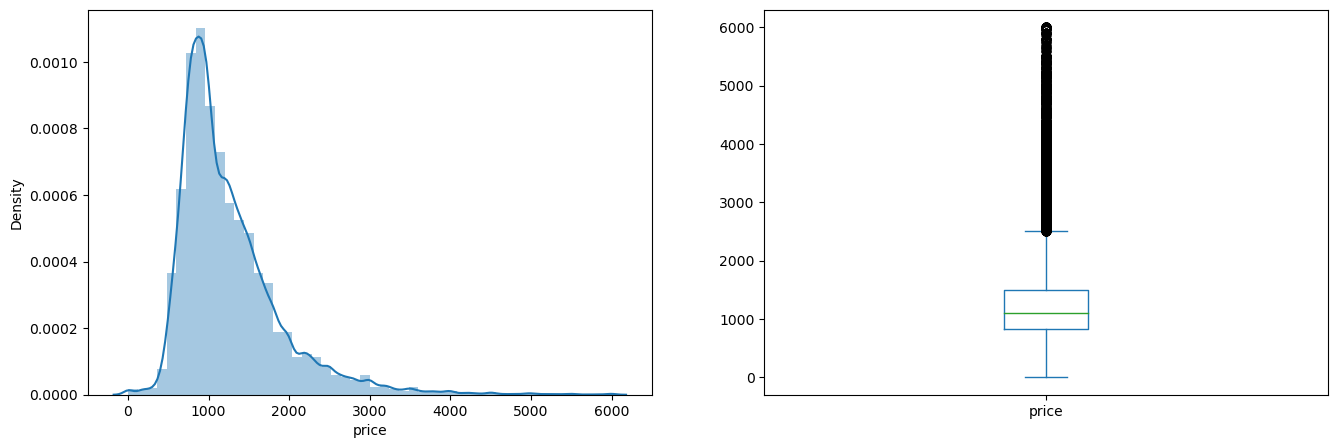

In [310]:
# create distribution plot and boxplot to check for outliers

plt.subplot(121)
sns.distplot(rentalunder6000["price"]);

plt.subplot(122)
rentalunder6000["price"].plot.box(figsize=(16,5))

plt.savefig("distribution.png", bbox_inches="tight")

plt.show()

In [311]:
rentalunder6000.head()

,sqfeet,beds,baths,parking_options,state,region,comes_furnished,type,price,laundry_options
0,1908,3,2.0,street parking,al,birmingham,0,apartment,1195,laundry on site
1,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120,laundry on site
2,1133,1,1.5,street parking,al,birmingham,0,apartment,825,laundry on site
3,927,1,1.0,street parking,al,birmingham,0,apartment,800,laundry on site
4,1047,2,1.0,street parking,al,birmingham,0,apartment,785,laundry on site


In [312]:
# renaming rental under 6000 to rentaldf
rentaldf = pd.DataFrame(rentalunder6000)
rentaldf.head()

,sqfeet,beds,baths,parking_options,state,region,comes_furnished,type,price,laundry_options
0,1908,3,2.0,street parking,al,birmingham,0,apartment,1195,laundry on site
1,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120,laundry on site
2,1133,1,1.5,street parking,al,birmingham,0,apartment,825,laundry on site
3,927,1,1.0,street parking,al,birmingham,0,apartment,800,laundry on site
4,1047,2,1.0,street parking,al,birmingham,0,apartment,785,laundry on site


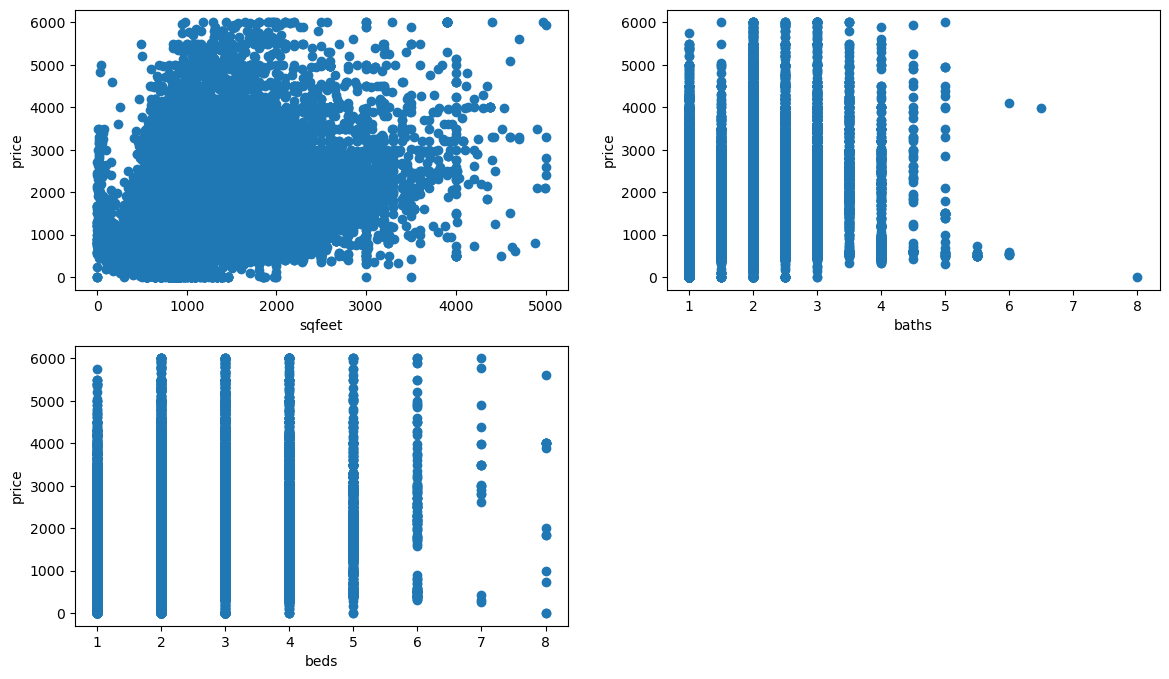

In [313]:
# visualize the relationship using scatter plots

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=rentaldf["sqfeet"], y=rentaldf["price"])
plt.xlabel("sqfeet")
plt.ylabel("price")

plt.subplot(2, 2, 3)
plt.scatter(x=rentaldf["beds"], y=rentaldf["price"])
plt.xlabel("beds")
plt.ylabel("price")

plt.subplot(2, 2, 2)
plt.scatter(x=rentaldf["baths"], y=rentaldf["price"])
plt.xlabel("baths")
plt.ylabel("price")

plt.savefig("scatterplots.png", bbox_inches="tight")
plt.show()

In [277]:
with pd.option_context('float_format', '{:f}'.format): print(rentaldf["beds"].describe())
with pd.option_context('float_format', '{:f}'.format): print(rentaldf["baths"].describe())
with pd.option_context('float_format', '{:f}'.format): print(rentaldf["sqfeet"].describe())

count   157369.000000
mean         1.974709
std          0.829520
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: beds, dtype: float64
count   157369.000000
mean         1.498259
std          0.580273
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: baths, dtype: float64
count   157369.000000
mean      1022.035731
std        412.453489
min          1.000000
25%        771.000000
50%        960.000000
75%       1170.000000
max      10000.000000
Name: sqfeet, dtype: float64


In [278]:
# limit the bed room number, bathroom and sqfeet 
rentaldf = rentaldf[rentaldf["beds"] <= 10].reset_index(drop=True)
rentaldf = rentaldf[rentaldf["baths"] <= 10].reset_index(drop=True)
rentaldf = rentaldf[rentaldf["sqfeet"] <= 40000].reset_index(drop=True)

In [279]:
with pd.option_context('float_format', '{:f}'.format): print(rentaldf["beds"].describe())
with pd.option_context('float_format', '{:f}'.format): print(rentaldf["baths"].describe())
with pd.option_context('float_format', '{:f}'.format): print(rentaldf["sqfeet"].describe())

print("Data type is {0} \n\nShape of dataframe is {1}\n".format(type(rentaldf), rentaldf.shape))

count   157369.000000
mean         1.974709
std          0.829520
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: beds, dtype: float64
count   157369.000000
mean         1.498259
std          0.580273
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: baths, dtype: float64
count   157369.000000
mean      1022.035731
std        412.453489
min          1.000000
25%        771.000000
50%        960.000000
75%       1170.000000
max      10000.000000
Name: sqfeet, dtype: float64
Data type is <class 'pandas.core.frame.DataFrame'> 

Shape of dataframe is (157369, 10)



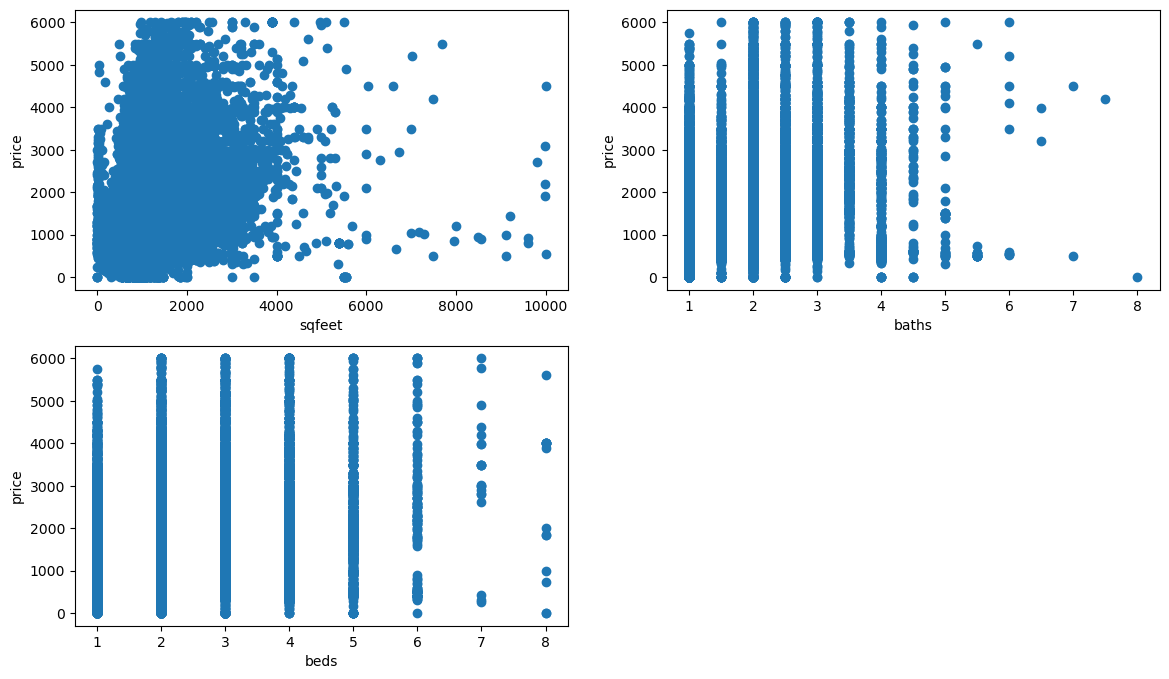

In [280]:
# visualize the relationship using scatter plots

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=rentaldf["sqfeet"], y=rentaldf["price"])
plt.xlabel("sqfeet")
plt.ylabel("price")

plt.subplot(2, 2, 3)
plt.scatter(x=rentaldf["beds"], y=rentaldf["price"])
plt.xlabel("beds")
plt.ylabel("price")

plt.subplot(2, 2, 2)
plt.scatter(x=rentaldf["baths"], y=rentaldf["price"])
plt.xlabel("baths")
plt.ylabel("price")

plt.savefig("scatterplots.png", bbox_inches="tight")
plt.show()

In [281]:
rentaldf.head()

,sqfeet,beds,baths,parking_options,state,region,comes_furnished,type,price,laundry_options
0,1908,3,2.0,street parking,al,birmingham,0,apartment,1195,laundry on site
1,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120,laundry on site
2,1133,1,1.5,street parking,al,birmingham,0,apartment,825,laundry on site
3,927,1,1.0,street parking,al,birmingham,0,apartment,800,laundry on site
4,1047,2,1.0,street parking,al,birmingham,0,apartment,785,laundry on site


In [282]:
rentaldf = rentaldf[["sqfeet", "beds", "baths", "region", "price"]]
rentaldf.head(10)

,sqfeet,beds,baths,region,price
0,1908,3,2.0,birmingham,1195
1,1319,3,2.0,birmingham,1120
2,1133,1,1.5,birmingham,825
3,927,1,1.0,birmingham,800
4,1047,2,1.0,birmingham,785
5,1298,2,2.0,birmingham,900
6,1350,2,2.0,birmingham,925
7,1375,3,2.0,birmingham,1355
8,1319,3,2.0,birmingham,1120
9,672,2,1.0,birmingham,685


In [283]:
# calculate correlation matrix
corr = rentaldf[["sqfeet", "baths", "beds", "price"]].corr()
corr

,sqfeet,baths,beds,price
sqfeet,1.000000,0.641705,0.715953,0.365099
baths,0.641705,1.000000,0.652315,0.313355
beds,0.715953,0.652315,1.000000,0.224407
price,0.365099,0.313355,0.224407,1.000000


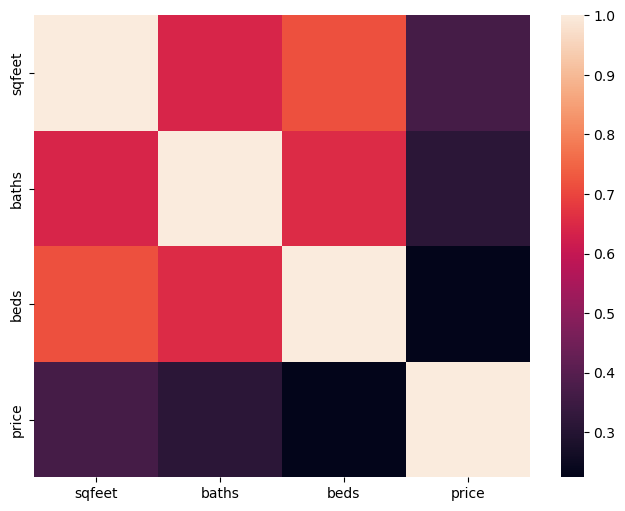

In [284]:
# visualize correlation matrix
plt.subplots(figsize=(8,6))

fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

fig.get_figure().savefig("corr_heatmap.png", bbox_inches="tight") 

In [285]:
# one hot encoding
rentalEncode = pd.get_dummies(rentaldf.region)

rentalEncode.head()

,SF bay area,akron / canton,albany,albuquerque,ames,anchorage / mat-su,ann arbor,annapolis,asheville,ashtabula,...,western maryland,western massachusetts,western slope,wichita,wilmington,winston-salem,worcester / central MA,yuba-sutter,yuma,zanesville / cambridge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
df11 = pd.concat([rentaldf, rentalEncode], axis='columns') 
df11.head()

,sqfeet,beds,baths,region,price,SF bay area,akron / canton,albany,albuquerque,ames,...,western maryland,western massachusetts,western slope,wichita,wilmington,winston-salem,worcester / central MA,yuba-sutter,yuma,zanesville / cambridge
0,1908,3,2.0,birmingham,1195,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1319,3,2.0,birmingham,1120,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1133,1,1.5,birmingham,825,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,927,1,1.0,birmingham,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1047,2,1.0,birmingham,785,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [287]:
# check summary info to see if one hot encoding is done properly
print(df11.shape, "\n")
df11.info()
df11.region

(157369, 301) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157369 entries, 0 to 157368
Columns: 301 entries, sqfeet to zanesville / cambridge
dtypes: float64(1), int64(3), object(1), uint8(296)
memory usage: 50.4+ MB


0         birmingham
1         birmingham
2         birmingham
3         birmingham
4         birmingham
             ...    
157364      columbus
157365      columbus
157366      columbus
157367      columbus
157368      columbus
Name: region, Length: 157369, dtype: object

In [288]:
df_regions = df11.copy().drop_duplicates(subset = "region")
df_regions = df_regions[['region']]

In [289]:
# separate data into X features and Y target
df11["region"] = [int(df_regions.index[df_regions['region'] == i].tolist()[0]) for i in df11["region"]]
X = df11.drop(columns=["price"])
Y = df11.price

In [291]:
# split data into random train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [293]:
X_train.head()

,sqfeet,beds,baths,region,SF bay area,akron / canton,albany,albuquerque,ames,anchorage / mat-su,...,western maryland,western massachusetts,western slope,wichita,wilmington,winston-salem,worcester / central MA,yuba-sutter,yuma,zanesville / cambridge
49322,955,2,1.0,38494,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41046,950,2,1.0,37248,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68109,982,2,1.0,66081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96903,1100,3,2.0,83092,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39804,1256,3,2.0,36973,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
# fit a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.6770605520469727

In [295]:
# make predictions
y_pred = regressor.predict(X_test)

In [296]:
print(X.columns)

Index(['sqfeet', 'beds', 'baths', 'region', 'SF bay area', 'akron / canton',
       'albany', 'albuquerque', 'ames', 'anchorage / mat-su',
       ...
       'western maryland', 'western massachusetts', 'western slope', 'wichita',
       'wilmington', 'winston-salem', 'worcester / central MA', 'yuba-sutter',
       'yuma', 'zanesville / cambridge'],
      dtype='object', length=300)


In [297]:
def predict_price(region,sqfeet, baths, beds):
    regions = np.where(X.columns==region)[0]
    if len(regions) == 0:
        return None
    
    loc_index = np.where(X.columns==region)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqfeet
    x[1] = baths
    x[2] = beds
    if loc_index >= 0:
        x[loc_index] = 1
        
    return regressor.predict([x])[0]

In [298]:
predict_price('winston-salem',1900, 3, 2) #region, sqfeet, baths, beds

1454.0491739566578